Loading pipeline components...:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([1, 768]) tensor(-9.3281) tensor(10.0735) tensor(-0.0115) tensor(0.7132)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

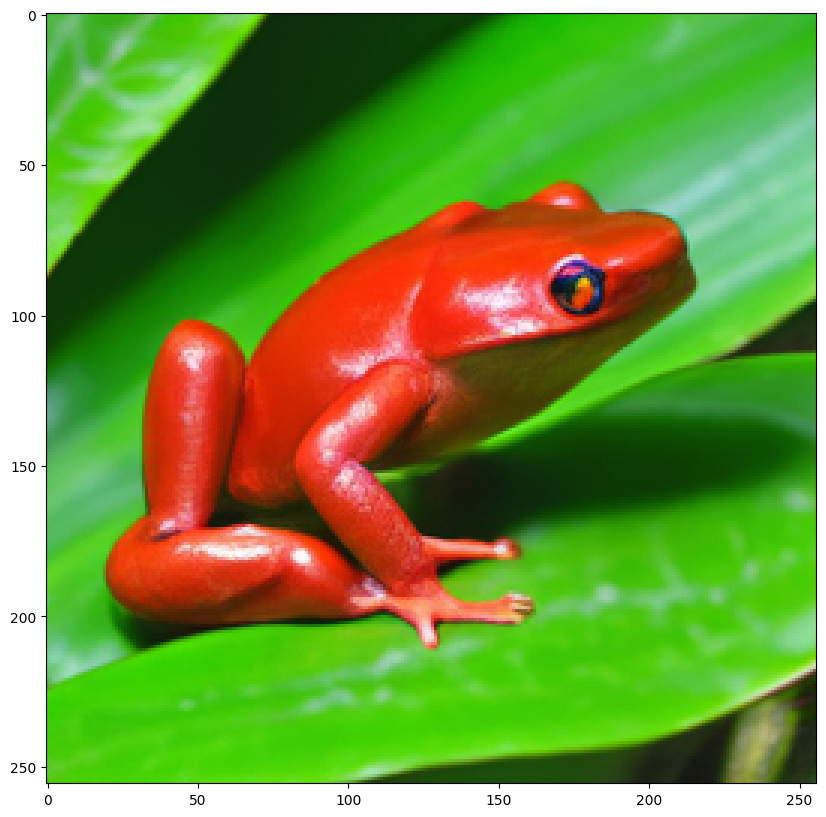

In [8]:
from diffusers import UnCLIPPipeline
import torch
pipe = UnCLIPPipeline.from_pretrained("kakaobrain/karlo-v1-alpha", torch_dtype=torch.float32)
pipe = pipe.to('cpu')
prompt = "a high-resolution photograph of a big red frog on a green leaf."
image = pipe([prompt], decoder_num_inference_steps=10, super_res_num_inference_steps= 7).images[0]
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)

In [7]:
pipe.prior

PriorTransformer(
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=2048, out_features=2048, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=2048, out_features=2048, bias=True)
  )
  (proj_in): Linear(in_features=768, out_features=2048, bias=True)
  (embedding_proj): Linear(in_features=768, out_features=2048, bias=True)
  (encoder_hidden_states_proj): Linear(in_features=768, out_features=2048, bias=True)
  (transformer_blocks): ModuleList(
    (0-19): 20 x BasicTransformerBlock(
      (norm1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
      (attn1): Attention(
        (to_q): Linear(in_features=2048, out_features=2048, bias=True)
        (to_k): Linear(in_features=2048, out_features=2048, bias=True)
        (to_v): Linear(in_features=2048, out_features=2048, bias=True)
        (to_out): ModuleList(
          (0): Linear(in_features=2048, out_features=2048, bias=True)
          (1): Dropout(p=0.0, inplace=Fa

Keyword arguments {'variation': 'fp16'} are not expected by StableUnCLIPImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

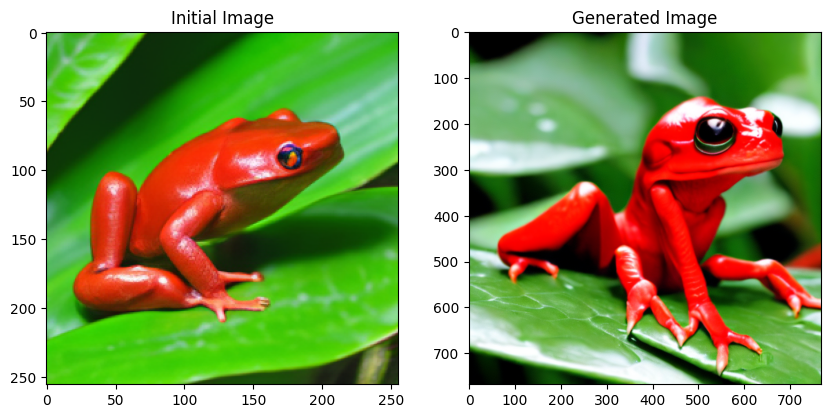

In [13]:
from diffusers import StableUnCLIPImg2ImgPipeline
from diffusers.utils import load_image
import matplotlib.pyplot as plt
import torch

pipe = StableUnCLIPImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-unclip", torch_dtype=torch.float16, variation="fp16"
)
pipe = pipe.to("cuda")

url = "https://static1.topspeedimages.com/wordpress/wp-content/uploads/2024/01/2024-toyota-gr-supra.png"
init_image = load_image(url)
init_image = image
images = pipe(init_image).images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(init_image)
ax[0].set_title("Initial Image")
ax[1].imshow(images[0])
ax[1].set_title("Generated Image")
plt.show()
